## Part I (Analytical Option Formulae)

> Consider the following European options:

-  Vanilla call/put
-  Digital cash-or-nothing call/put
-  Digital asset-or-nothing call/put

> Derive and implement the following models to value these options in Python:

- Black-Scholes model
- Bachelier model
- Black76 model
- Displaced-diffusion model

### 1. Black-Scholes Model (Geometric - Spot price process)
####  1-1 Black-Scholes Model (Vanilla call/put)

\begin{equation}
\begin{split}
C(S,K,r,\sigma,T) &= S_0 \Phi(d_1) - K e^{-rT} \Phi(d_2)\\
            d_1 &= \frac{\log \frac{S_0}{K} +
            \left(r+\frac{\sigma^2}{2}\right)T}{\sigma\sqrt{T}}, \hspace{2cm} d_2 = d_1 - \sigma\sqrt{T}\\
\end{split}            
\end{equation}

\begin{equation}
\begin{split}
P(S,K,r,\sigma,T) &= K e^{-rT} \Phi(-d_2) - S_0 \Phi(-d_1)\\
            d_1 &= \frac{\log \frac{S_0}{K} +
            \left(r+\frac{\sigma^2}{2}\right)T}{\sigma\sqrt{T}}, \hspace{2cm} d_2 = d_1 - \sigma\sqrt{T}\\
\end{split}            
\end{equation}

In [3]:
import numpy as np
from scipy.stats import norm

In [4]:
def BlackScholesCall(S, K, r, sigma, T):
    d1 = (np.log(S/K)+(r+sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    return S*norm.cdf(d1) - K*np.exp(-r*T)*norm.cdf(d2)
def BlackScholesPut(S, K, r, sigma, T):
    d1 = (np.log(S/K)+(r+sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    return K*np.exp(-r*T)*norm.cdf(-d2) - S*norm.cdf(-d1)

In [11]:
PutCallParity(BlackScholesCall(100,100,0.05,0.2,1/12),BlackScholesPut(100,100,0.05,0.2,1/12),
             100,100,0.05,1/12)

'Correct: Parity equals 0.0'

#### 1-2 Black-Scholes Model(Digital cash-or-nothing call/put)
\begin{equation}
\begin{split}
C(S,K,r,\sigma,T) &= e^{-rT} \ \Phi(d_2)\\
            d_1 &= \frac{\log \frac{S_0}{K} +
            \left(r+\frac{\sigma^2}{2}\right)T}{\sigma\sqrt{T}}, \hspace{2cm} d_2 = d_1 - \sigma\sqrt{T}\\
\end{split}            
\end{equation}

\begin{equation}
\begin{split}
P(S,K,r,\sigma,T) &= e^{-rT} \Phi(-d_2)\\
            d_1 &= \frac{\log \frac{S_0}{K} +
            \left(r+\frac{\sigma^2}{2}\right)T}{\sigma\sqrt{T}}, \hspace{2cm} d_2 = d_1 - \sigma\sqrt{T}\\
\end{split}            
\end{equation}

In [12]:
def BlackScholesDCashCall(S, K, r, sigma ,T):
    d1 = (np.log(S/K)+(r+sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    return np.exp(-r*T)*norm.cdf(d2)

def BlackScholesDCashPut(S, K, r, sigma ,T):
    d1 = (np.log(S/K)+(r+sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    return np.exp(-r*T)*norm.cdf(-d2)

In [13]:
PutCallParity(BlackScholesDCashCall(100,100,0.05,0.2,1/12),BlackScholesDCashCall(100,100,0.05,0.2,1/12),
             100,100,0.05,1/12)

'False: Parity equals -0.41579981548900946'

#### 1-3 Black-Scholes Model(Digital Asset-or-nothing call/put)
\begin{equation}
\begin{split}
C(S,K,r,\sigma,T) &= S0 \ \Phi(d_1)\\
            d_1 &= \frac{\log \frac{S_0}{K} +
            \left(r+\frac{\sigma^2}{2}\right)T}{\sigma\sqrt{T}}, \hspace{2cm} d_2 = d_1 - \sigma\sqrt{T}\\
\end{split}            
\end{equation}

\begin{equation}
\begin{split}
P(S,K,r,\sigma,T) &= S0\ \Phi(-d_1)\\
            d_1 &= \frac{\log \frac{S_0}{K} +
            \left(r+\frac{\sigma^2}{2}\right)T}{\sigma\sqrt{T}}, \hspace{2cm} d_2 = d_1 - \sigma\sqrt{T}\\
\end{split}            
\end{equation}

In [14]:
def BlackScholesDAssetCall(S, K, r, sigma ,T):
    d1 = (np.log(S/K)+(r+sigma**2/2)*T) / (sigma*np.sqrt(T))
    #d2 = d1 - sigma*np.sqrt(T)
    return S*norm.cdf(d1)

def BlackScholesDAssetPut(S, K, r, sigma ,T):
    d1 = (np.log(S/K)+(r+sigma**2/2)*T) / (sigma*np.sqrt(T))
    #d2 = d1 - sigma*np.sqrt(T)
    return S*norm.cdf(-d1)

In [15]:
PutCallParity(BlackScholesDAssetCall(100,100,0.05,0.2,1/12),BlackScholesDAssetCall(100,100,0.05,0.2,1/12),
             100,100,0.05,1/12)

'False: Parity equals -0.41579981548900946'

### 2. Bachelier model (Arithmetic process) 

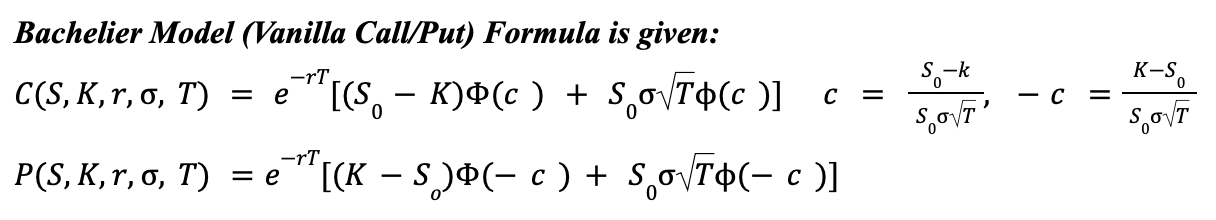

In [34]:
# Vanilla call/put
def BachelierCall(S, K, r, sigma, T):
    c = (S-K) / (sigma*S*np.sqrt(T)) 
    return np.exp(-r*T)*((S-K)*norm.cdf(c) + sigma*S*np.sqrt(T)*norm.pdf(c))

def BachelierPut(S, K, r, sigma, T):
    c = (S-K) / (sigma*S*np.sqrt(T))
    return np.exp(-r*T)*((K-S)*norm.cdf(-c) + sigma*S*np.sqrt(T)*norm.pdf(-c))

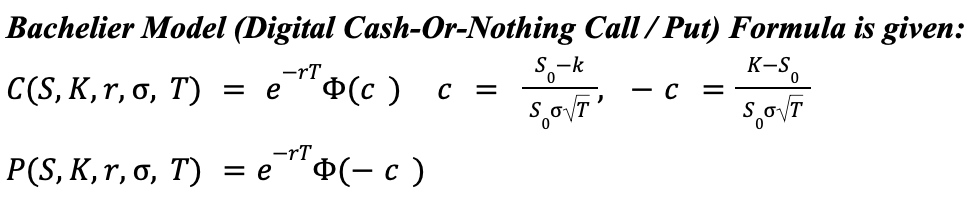

In [18]:
# Digital cash-or-nothing call/put
def BachelierDCashCall(S, K, r, sigma, T):
    c = (S-K) / (sigma*S*np.sqrt(T))
    return np.exp(-r*T)*norm.cdf(c)

def BachelierDCashPut(S, K, r, sigma, T):
    c = (S-K) / (sigma*S*np.sqrt(T))
    return np.exp(-r*T)*norm.cdf(-c)

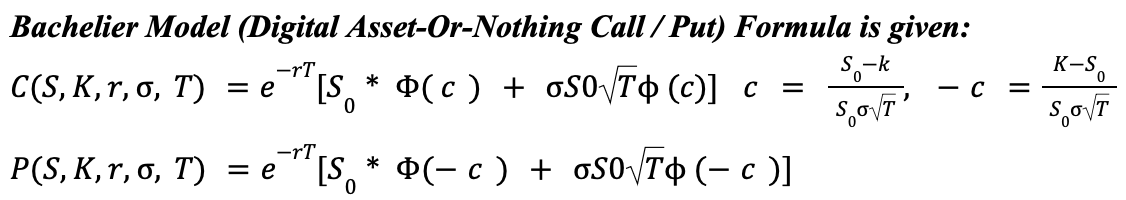

In [19]:
# Asset-or-nothing call/put
def BachelierDAssetCall(S, K, r, sigma, T):
    c = (S-K) / (sigma*S*np.sqrt(T))
    return np.exp(-r*T)*(S*norm.cdf(c) + sigma*S*np.sqrt(T)*norm.pdf(c))

def BachelierDAssetPut(S, K, r, sigma, T):
    c = (S-K) / (sigma*S*np.sqrt(T))
    return np.exp(-r*T)*(S*norm.cdf(-c) + sigma*S*np.sqrt(T)*norm.pdf(-c))

### 3. Black model  (Geometric - Forward price process)

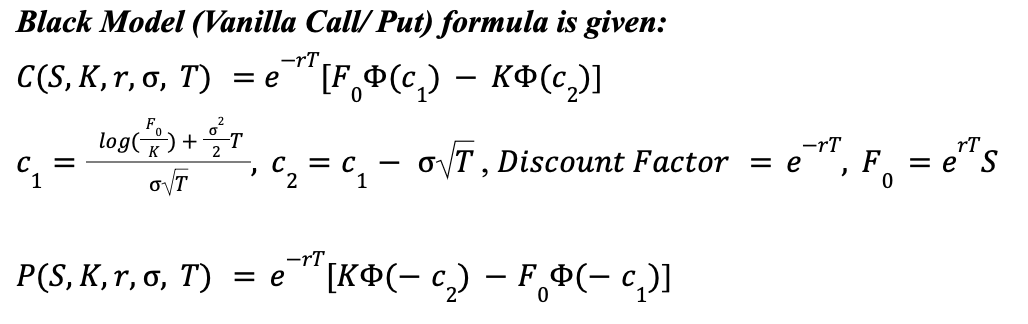

In [21]:
# Vanilla call/put
def Black76Call(S, K, r, sigma, T):
    F = np.exp(r*T)*S # forward price
    c1 = (np.log(F/K)+sigma**2/2*T) / (sigma*np.sqrt(T))
    c2 = c1 - sigma*np.sqrt(T)
    discount = np.exp(-r*T)  # discount factor
    return discount*(F*norm.cdf(c1) - K*norm.cdf(c2))

def Black76Put(S, K, r, sigma, T):
    F = np.exp(r*T)*S
    c1 = (np.log(F/K)+sigma**2/2*T) / (sigma*np.sqrt(T))
    c2 = c1 - sigma*np.sqrt(T)
    discount = np.exp(-r*T)
    return discount*(K*norm.cdf(-c2) - F*norm.cdf(-c1))

In [22]:
PutCallParity(Black76Call(100,100,0.05,0.2,1/12), Black76Put(100,100,0.05,0.2,1/12),
             100,100,0.05,1/12)

'Correct: Parity equals -1.4210854715202004e-14'

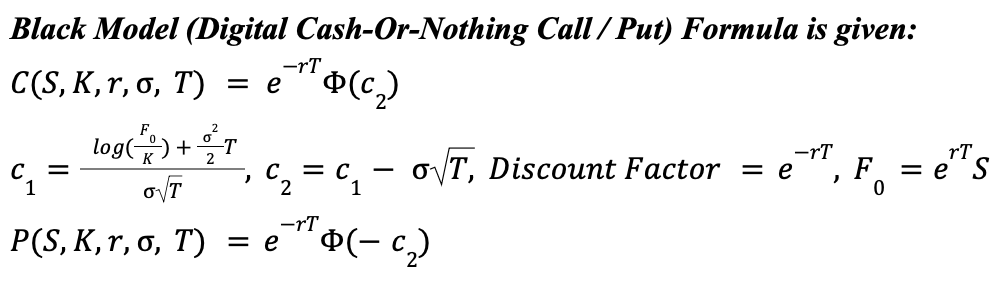

In [27]:
# Digital cash-or-nothing call/put
def Black76DCashCall(S, K, r, sigma, T):
    F = np.exp(r*T)*S
    c1 = (np.log(F/K)+sigma**2/2*T) / (sigma*np.sqrt(T))
    c2 = c1 - sigma*np.sqrt(T)
    discount = np.exp(-r*T)
    return discount*norm.cdf(c2)

def Black76DCashPut(S, K, r, sigma, T):
    F = np.exp(r*T)*S
    c1 = (np.log(F/K)+sigma**2/2*T) / (sigma*np.sqrt(T))
    c2 = c1 - sigma*np.sqrt(T)
    discount = np.exp(-r*T)
    return discount*norm.cdf(-c2)

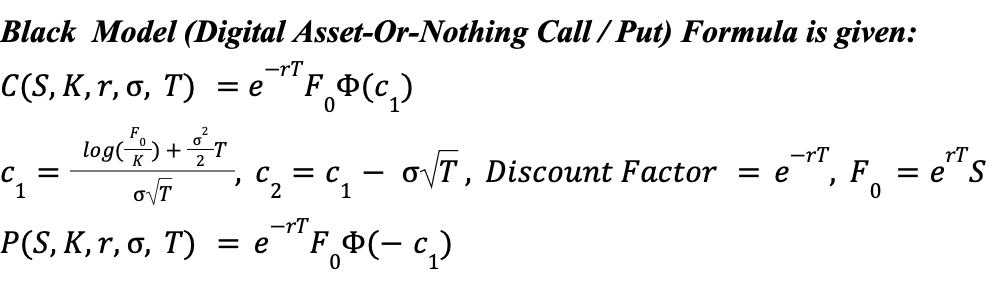

In [29]:
# Digital Asset-or-nothing call/put
def Black76DAssetCall(S, K, r, sigma, T):
    F = np.exp(r*T)*S
    c1 = (np.log(F/K)+sigma**2/2*T) / (sigma*np.sqrt(T))
    c2 = c1 - sigma*np.sqrt(T)
    discount = np.exp(-r*T)
    return F*discount*norm.cdf(c1)

def Black76DAssetPut(S, K, r, sigma, T):
    F = np.exp(r*T)*S
    c1 = (np.log(F/K)+sigma**2/2*T) / (sigma*np.sqrt(T))
    c2 = c1 - sigma*np.sqrt(T)
    discount = np.exp(-r*T)
    return F*discount*norm.cdf(-c1)

### 4. Displaced-diffusion model (Forward price process)
- if Beta equal to 1 back to Black Model

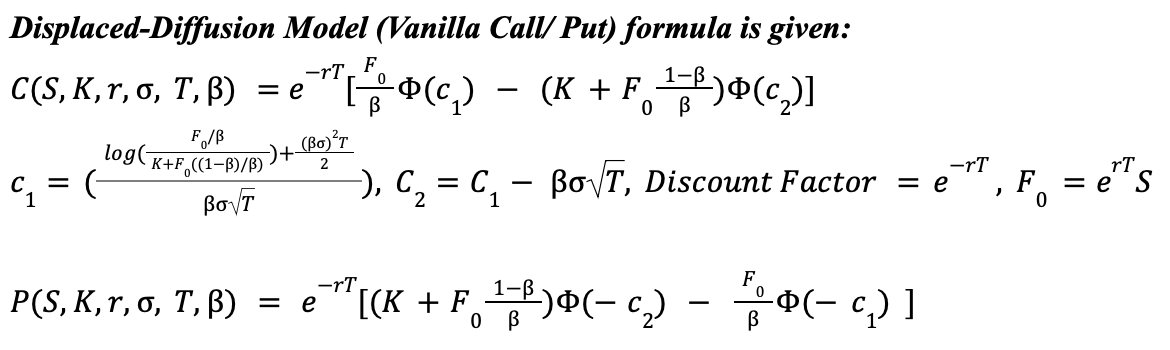

In [ ]:
# Vanilla call/put
def DisplacedDiffusionCall(S, K, r, sigma, T, beta):
    F = np.exp(r*T)*S
    c1 = (np.log(F/(F+beta*(K-F)))+(beta*sigma)**2/2*T) / (beta*sigma*np.sqrt(T))
    c2 = c1 - beta*sigma*np.sqrt(T)
    disc = np.exp(-r*T)
    return disc*(F/beta*norm.cdf(c1) - ((1-beta)/beta*F + K)*norm.cdf(c2))

def DisplacedDiffusionPut(S, K, r, sigma, T, beta):
    F = np.exp(r*T)*S
    c1 = (np.log(F/(F+beta*(K-F)))+(beta*sigma)**2/2*T) / (beta*sigma*np.sqrt(T))
    c2 = c1 - beta*sigma*np.sqrt(T)
    disc = np.exp(-r*T)
    return disc*(((1-beta)/beta*F + K)*norm.cdf(-c2) - F/beta*norm.cdf(-c1))

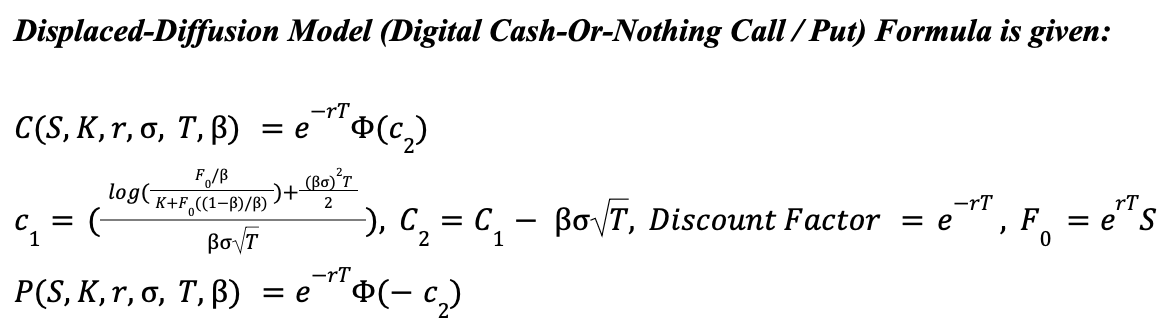

In [ ]:
# Digital cash-or-nothing call/put
def DisplacedDiffusionDCashCall(S, K, r, sigma, T, beta):
    F = np.exp(r*T)*S
    c1 = (np.log(F/(F+beta*(K-F)))+(beta*sigma)**2/2*T) / (beta*sigma*np.sqrt(T))
    c2 = c1 - beta*sigma*np.sqrt(T)
    disc = np.exp(-r*T)
    return disc*norm.cdf(c2)

def DisplacedDiffusionDCashPut(S, K, r, sigma, T, beta):
    F = np.exp(r*T)*S
    c1 = (np.log(F/(F+beta*(K-F)))+(beta*sigma)**2/2*T) / (beta*sigma*np.sqrt(T))
    c2 = c1 - beta*sigma*np.sqrt(T)
    disc = np.exp(-r*T)
    return disc*norm.cdf(-c2)

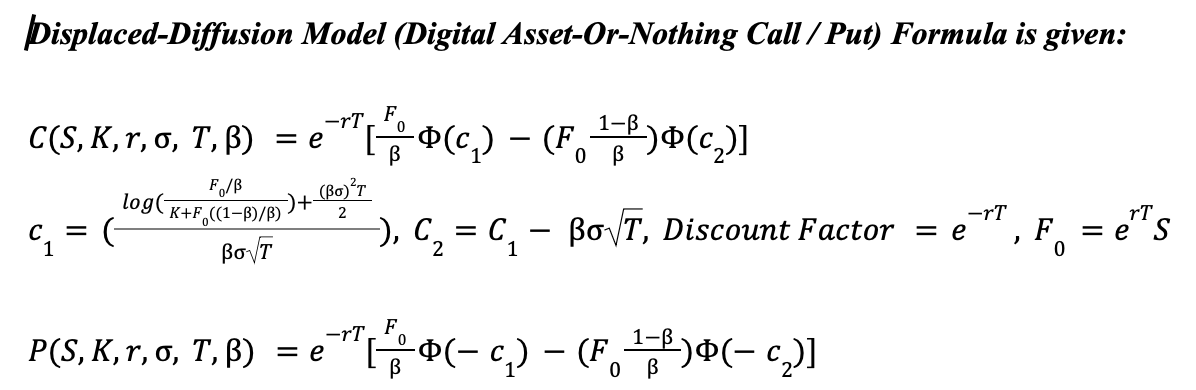

In [1]:
# Asset cash-or-nothing call/put
def DisplacedDiffusionDAssetCall(S, K, r, sigma, T, beta):
    F = np.exp(r*T)*S
    c1 = (np.log(F/(F+beta*(K-F)))+(beta*sigma)**2/2*T) / (beta*sigma*np.sqrt(T))
    c2 = c1 - beta*sigma*np.sqrt(T)
    disc = np.exp(-r*T)
    return disc*(F/beta*norm.cdf(c1) - ((1-beta)/beta*F)*norm.cdf(c2))

def DisplacedDiffusionDAssetPut(S, K, r, sigma, T, beta):
    F = np.exp(r*T)*S
    c1 = (np.log(F/(F+beta*(K-F)))+(beta*sigma)**2/2*T) / (beta*sigma*np.sqrt(T))
    c2 = c1 - beta*sigma*np.sqrt(T)
    disc = np.exp(-r*T)
    return disc*(F/beta*norm.cdf(-c1) - ((1-beta)/beta*F)*norm.cdf(-c2))

# Notes for Part 1

1. Why Bachelier has Underlying Stock S0 in the Valuation Formula (and no Discount Factor) 
- reference: https://arxiv.org/pdf/2104.08686.pdf
2. Displaced-diffusion valuation formula
2. Put Call Parity does not hold for anything that is not Vanilla (i.e. Binary Options)
3. Need to refactor codes for Parity Function & all the models into 1 Function)
4. Models with no Rf parameter (such as Bachelier) does not have discount factor applied to the Valuation

In [5]:
# Call Put Parity 
def PutCallParity(C,P,S,K,r,T):
    Parity = (C - P - S + K*np.exp(-r*T))
    if  round(Parity,2) == 0:    
        return f'Correct: Parity equals {Parity}'
    else:
        return f'False: Parity equals {Parity}'